In [ ]:
"""Video by <a href="https://pixabay.com/users/aubreykhokid-20033655/?utm_source=link-attribution&utm_medium=referral&utm_campaign=video&utm_content=140828">Aubrey Khokid</a> from <a href="https://pixabay.com//?utm_source=link-attribution&utm_medium=referral&utm_campaign=video&utm_content=140828">Pixabay</a>"""

'Video by <a href="https://pixabay.com/users/aubreykhokid-20033655/?utm_source=link-attribution&utm_medium=referral&utm_campaign=video&utm_content=140828">Aubrey Khokid</a> from <a href="https://pixabay.com//?utm_source=link-attribution&utm_medium=referral&utm_campaign=video&utm_content=140828">Pixabay</a>'

In [ ]:
# !pip install ultralytics cvzone supervision mediapipe -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.6/615.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 40.6 MB/s eta 0:00:00


In [ ]:
from cvzone.PoseModule import PoseDetector
import cv2
import supervision as sv

pose_detector = PoseDetector()

In [1]:



!wget "https://img.freepik.com/premium-photo/she-wears-her-clothes-with-attitude-full-length-studio-shot-young-woman-isolated-white_590464-39594.jpg" -O "input.jpg"

--2023-09-29 22:00:25--  https://img.freepik.com/premium-photo/she-wears-her-clothes-with-attitude-full-length-studio-shot-young-woman-isolated-white_590464-39594.jpg
Resolving img.freepik.com (img.freepik.com)... 23.221.32.59, 2600:1417:75:20ae::312e, 2600:1417:75:2090::312e
Connecting to img.freepik.com (img.freepik.com)|23.221.32.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21486 (21K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  20.98K  --.-KB/s    in 0.04s   

2023-09-29 22:00:26 (486 KB/s) - ‘input.jpg’ saved [21486/21486]



In [ ]:
imarr = cv2.imread("input.jpg")

In [ ]:
imarr.shape

(626, 417, 3)

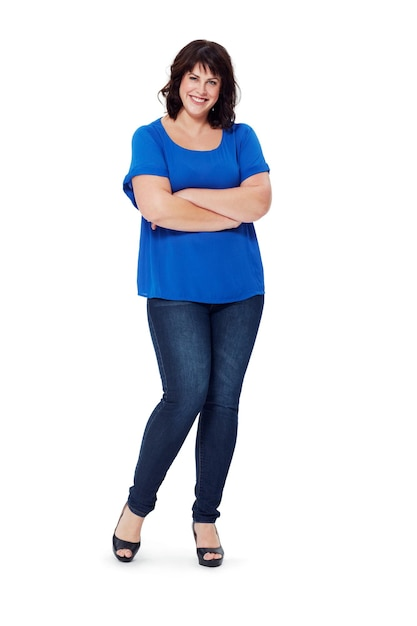

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(imarr)

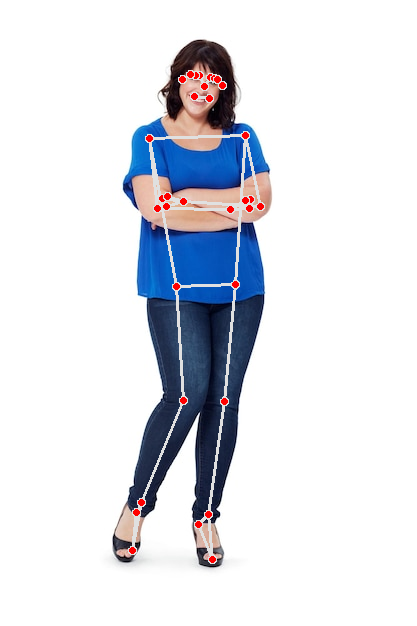

In [ ]:
cv2_imshow(pose_detector.findPose(imarr))

In [ ]:
imarr = cv2.imread("input.jpg")
for idx,p in enumerate(pose_detector.findPosition(imarr)[0]):
  x,y,_  = p
  cv2.circle(imarr,(x,y),1,(255,0,0),3)
  cv2.putText(imarr,f"{idx}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(255,0,0),1)

In [ ]:
## leg right 31 , left 32

In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
pose  = solutions.pose.Pose()

In [142]:
counter = 0
start = None
end = None
no_of_frame = 5
step_path_list = []
all_centre_points = []
thersold = 0
def process(imarr,_):
  global counter,start,end
  imarr=cv2.cvtColor(imarr,cv2.COLOR_BGR2RGB)
  h,w,_ = imarr.shape
  result  =  pose.process( imarr ).pose_landmarks
  imarr = cv2.cvtColor(imarr,cv2.COLOR_RGB2BGR)
  if result:
    all_points  = list(result.landmark)
    leg_point = [ (  int((all_points[31].x)*w), int((all_points[31].y)*h)  ),
     (  int((all_points[32].x)*w), int((all_points[32].y)*h)  )  ]
    if not counter:
      start  = leg_point[-1]
    counter = counter + 1
    if not counter%no_of_frame:
      # cv2.circle(imarr,leg_point[-1],3,(0,0,255),2)
      all_centre_points.append([start,leg_point[-1]])
      # print(all_centre_points)
      start  = leg_point[-1]
      for p in all_centre_points:
        p1,p2 = p[0],p[1]
        # if (abs(p1[0] - p2[0])>thersold) or (abs(p1[1] - p2[1])>thersold):
        # cv2.circle(imarr,p,3,(0,0,255),2)
        # print("inside the line")
        cv2.line(imarr,p1,p2,(204, 102, 255),2)
    if not counter%100:
      cv2_imshow(imarr)
    # imarr = cv2.cvtColor(imarr,cv2.COLOR_RGB2BGR)
    # for idx,p in enumerate(leg_point):
    #   x,y = p
    #   cv2.circle(imarr,(x,y),1,(0,0,255),3)
    #   cv2.putText(imarr,f"{idx}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255),1)
    # cv2_imshow(imarr)
  return imarr
  # return pose_detector.findPose(imarr,draw=True)


In [143]:
cap = cv2.VideoCapture("video (1080p).mp4")
cap.get(cv2.CAP_PROP_FRAME_WIDTH),cap.get(cv2.CAP_PROP_FRAME_HEIGHT),cap.get(cv2.CAP_PROP_FPS)

(1080.0, 1920.0, 23.976023976023978)

In [ ]:


import cv2
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20, (1080,1920),)
cap = cv2.VideoCapture("video (1080p).mp4")
while True:
    ret, frame = cap.read()
    if not ret:
        break
    out.write(process(frame,""))

cap.release()
out.release()


In [ ]:
out = cv2.VideoCapture('output.mp4')
cv2_imshow(out.read()[-1])

In [ ]:
out = cv2.VideoCapture('output.mp4')
ret = True
counter = 0
while ret:
    if ret:
        ret, frame = out.read()
        counter  = counter  +  1
        if not counter%50:
          cv2_imshow(frame)

In [112]:
# sv.process_video("man_-_76621 (720p).mp4","out.mp4",process)

In [ ]:
cap = cv2.VideoCapture("out.mp4")
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH),cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
cap.release()

In [ ]:

step_path_list

In [ ]:
np.zeros((int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),3)).shape

(0, 0, 3)

In [ ]:
black_img = np.zeros((1280,720,3))
for point in step_path_list:
  start , end = point[0],point[-1]
  # print(start,end)
  cv2.line(black_img,start,end,(0,0,255),5)

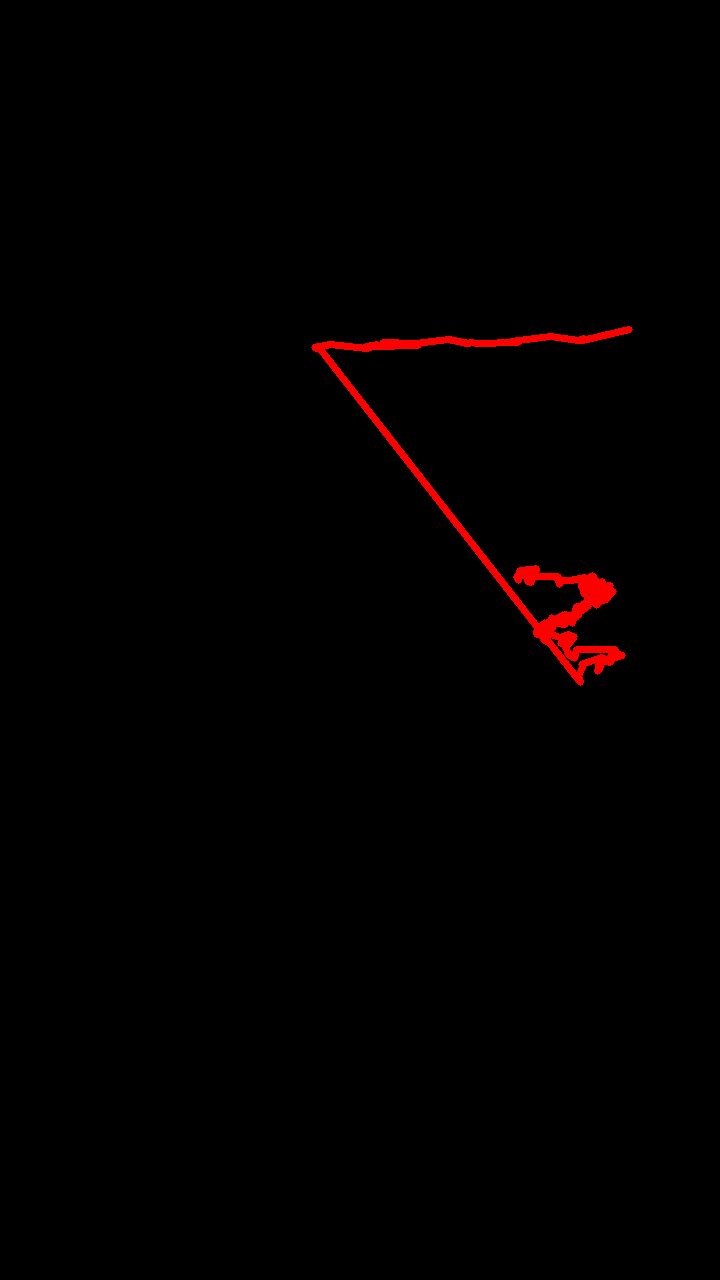

In [ ]:
cv2_imshow(black_img)

In [ ]:
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture("out.mp4")
for i in range(5):
  imarr = cap.read()[-1]
  cv2_imshow(imarr)
